<a href="https://colab.research.google.com/github/mkbahk/AmazonBraket/blob/main/CodingwithQiskit1_x_Episode4_Primitives_Sampler_mkbahk_20241218.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Qiskit Programming Process
1. Map the Problem to Circuits and Operators
2. Optimize the Circuit
3. Execute it on a Backend
4. Post-Process the Result

##Install Qiskit

In [1]:
%pip install qiskit[all]==1.3.1
%pip install qiskit_aer==0.15.1
%pip install qiskit-ibm-runtime==0.34.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 539.8/539.8 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 8.8 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=50d3e7c4d3fc907e7f8999c5f729e95d

#Version checking

In [2]:
%pip show qiskit qiskit_aer qiskit-ibm-runtime

Name: qiskit
Version: 1.3.1
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: dill, numpy, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy, typing-extensions
Required-by: qiskit-aer, qiskit-ibm-runtime, qiskit-qasm3-import
---
Name: qiskit-aer
Version: 0.15.1
Summary: Aer - High performance simulators for Qiskit
Home-page: https://github.com/Qiskit/qiskit-aer
Author: AER Development Team
Author-email: qiskit@us.ibm.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, psutil, qiskit, scipy
Required-by: 
---
Name: qiskit-ibm-runtime
Version: 0.34.0
Summary: IBM Quantum client for Qiskit Runtime.
Home-page: 
Author: 
Author-email: Qiskit Development Team <qiskit@us.

In [3]:
import qiskit
qiskit.__version__

'1.3.1'

In [4]:
import qiskit_aer
qiskit_aer.__version__

'0.15.1'

In [5]:
import qiskit_ibm_runtime
qiskit_ibm_runtime.__version__

'0.34.0'

##Set up an Quantum Runtime Service channel

In [37]:
#from qiskit_ibm_runtime import QiskitRuntimeService

# Save an IBM Quantum account and set it as your default account.
#QiskitRuntimeService.save_account(
#    channel="ibm_cloud",
#    token="y",
#    instance="",
#    # Explicitly set instance to None for ibm_cloud channel
#    set_as_default=True,
#    # Use `overwrite=True` if you're updating your token.
#    overwrite=True,
#)

# Load saved credentials
#service = QiskitRuntimeService()

In [8]:
#from qiskit_ibm_runtime import QiskitRuntimeService
#service = QiskitRuntimeService(channel="ibm_cloud",
                               token="",
                               instance="crn:v1:bluemix:public:quantum-computing:us-east:a/71306d10032b425fb301ccb4c4df2a2c:d0110720-03da-486e-82b6-b49f8f574626::")
#service

<QiskitRuntimeService>

In [27]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService(channel="ibm_quantum",
                               token="",
                               instance="ibm-q/open/main")
service

<QiskitRuntimeService>

In [29]:
#backends= service.backends()
backends= service.backends(operational=True, simulator=False, min_num_qubits=5)
backends

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_sherbrooke')>,
 <IBMBackend('ibm_kyiv')>]

In [30]:
#backend = service.backends()[0]
#backend = service.least_busy(operational=True, simulator=False)
backend = service.backend(name="ibm_brisbane")
#backend = service.backend("ibmq_qasm_simulator")
#backend = service.backend("simulator_statevector")
#backend = service.backend("simulator_mps")
#backend = service.backend("simulator_stabilizer")
backend

<IBMBackend('ibm_brisbane')>

In [31]:
backend.backend_version

'1.1.61'

In [32]:
backend.num_qubits

127

# EPISODE 4: Primitives


#Transverse field Ising model to demo primitives


In [33]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import YGate, UnitaryGate
import numpy as np

SYGate = UnitaryGate(YGate().power(1/2), label=r"$\sqrt{Y}$")
SYdgGate = UnitaryGate(SYGate.inverse(), label=r"$\sqrt{Y}^\dag$")

def generate_1d_tfim_circuit(num_qubits, num_trotter_steps, rx_angle, num_cl_bits=0, trotter_barriers = False, layer_barriers = False):
    if num_cl_bits == 0:
        qc = QuantumCircuit(num_qubits)
    else:
        qc = QuantumCircuit(num_qubits, num_cl_bits)
    ###if

    for trotter_step in range(num_trotter_steps):
        add_1d_tfim_trotter_layer(qc, rx_angle, layer_barriers)
        if trotter_barriers:
            qc.barrier()
        ###if
    ###for
    return qc

###def

def add_1d_tfim_trotter_layer(qc, rx_angle, layer_barriers = False):
    # Adding Rzz in the even layers
    for i in range(0, qc.num_qubits-1, 2):
        qc.sdg([i, i+1])
        qc.append(SYGate, [i+1])
        qc.cx(i, i+1)
        qc.append(SYdgGate, [i+1])
    ###for

    if layer_barriers:
        qc.barrier()
    ###if

    # Adding Rzz in the odd layers
    for i in range(1, qc.num_qubits-1, 2):
        qc.sdg([i, i+1])
        qc.append(SYGate, [i+1])
        qc.cx(i, i+1)
        qc.append(SYdgGate, [i+1])
    ###for
    if layer_barriers:
        qc.barrier()
    ###if
    qc.rx(rx_angle, list(range(qc.num_qubits)))
    if layer_barriers:
        qc.barrier()
    ###if
###def

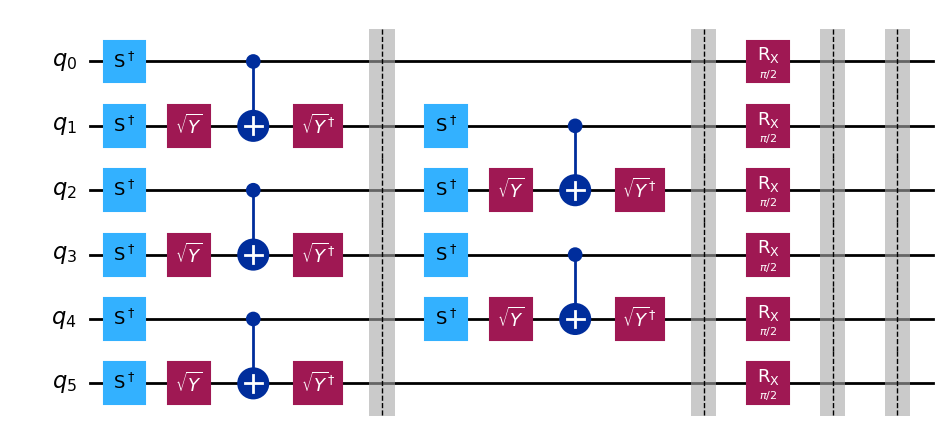

In [34]:
num_qubits = 6
num_trotter_steps = 1
rx_angle = 0.5 * np.pi

qc = generate_1d_tfim_circuit(num_qubits, num_trotter_steps, rx_angle, trotter_barriers=True, layer_barriers=True)
qc.draw(output='mpl', fold=-1)

# Demo: Sampler

In [35]:
def append_mirrored_1d_tfim_circuit(qc, num_qubits, num_trotter_steps, rx_angle, trotter_barriers = False, layer_barriers = False):
    for trotter_step in range(num_trotter_steps):
        add_mirrored_1d_tfim_trotter_layer(qc, rx_angle, layer_barriers)
        if trotter_barriers:
            qc.barrier()
        ###if
    ###for
###def

def add_mirrored_1d_tfim_trotter_layer(qc, rx_angle, layer_barriers = False):
    # Note after filming:
    # I constructed the inverse by hand here
    # But you could also use QuantumCircuit.inverse() to do this more efficiently
    qc.rx(-rx_angle, list(range(qc.num_qubits)))
    if layer_barriers:
        qc.barrier()
    ###if
    # Adding Rzz in the odd layers
    for i in range(1, qc.num_qubits-1, 2):
        qc.append(SYGate, [i+1])
        qc.cx(i, i+1)
        qc.append(SYdgGate, [i+1])
        qc.s([i, i+1])
    ###for

    if layer_barriers:
        qc.barrier()
    ###fif

    # Adding Rzz in the even layers
    for i in range(0, qc.num_qubits-1, 2):
        qc.append(SYGate, [i+1])
        qc.cx(i, i+1)
        qc.append(SYdgGate, [i+1])
        qc.s([i, i+1])
    ###for

    if layer_barriers:
        qc.barrier()
    ###if
###def

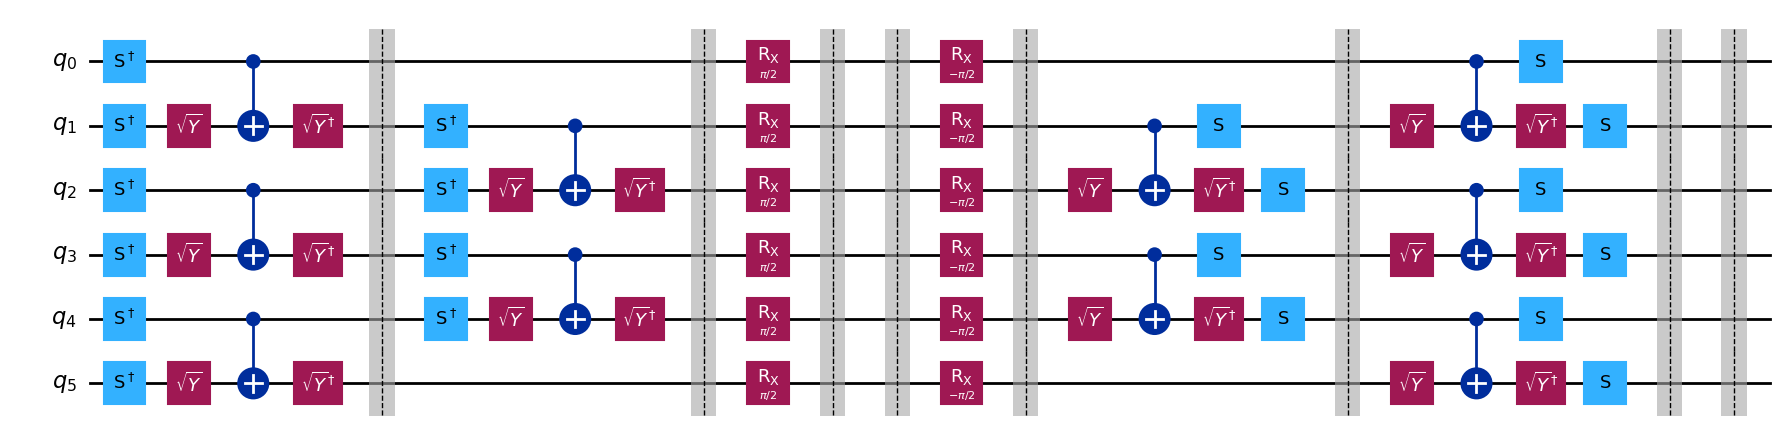

In [36]:
append_mirrored_1d_tfim_circuit(qc, num_qubits, num_trotter_steps, rx_angle, trotter_barriers=True, layer_barriers=True)
qc.draw(output='mpl', fold=-1)


#Step 1: Map the problem to circuits and observables


In [37]:
max_trotter_steps = 10
num_qubits = 100
measured_qubits = [49, 50]

qc_list = []
for trotter_steps in range(max_trotter_steps):
    qc = generate_1d_tfim_circuit(num_qubits, trotter_steps, rx_angle, num_cl_bits=len(measured_qubits), trotter_barriers=True, layer_barriers=True)
    append_mirrored_1d_tfim_circuit(qc, num_qubits, trotter_steps, rx_angle, trotter_barriers=True, layer_barriers=True)
    qc.measure(measured_qubits, list(range(len(measured_qubits))))
    qc_list.append(qc)
###for

# Step 2: Optimize

In [38]:
from qiskit import transpile
from qiskit_ibm_runtime import QiskitRuntimeService

#service = QiskitRuntimeService()
#backend = service.backend(name='ibm_brisbane')
#print("Done getting the backend")

# Note after filming:
# `transpile` will be deprecated soon
# so in the future, use `generate_preset_pass_manager` to achieve similar functionality
qc_transpiled_list = transpile(qc_list, backend=backend, optimization_level=1)

# Step 3: Execute on hardware

In [40]:
from qiskit_ibm_runtime import SamplerV2 as Sampler

#sampler = Sampler(backend=backend)
sampler = Sampler(backend)
sampler.options.dynamical_decoupling.enable = True
sampler.options.dynamical_decoupling.sequence_type = "XY4"

job = sampler.run(qc_transpiled_list)
print(job.job_id())

cxjcghj3ej4g008gdp8g


In [46]:
job.status()

'DONE'

# Step 4: Post-processing and plotting

In [47]:
job_id = "cxjcghj3ej4g008gdp8g"
job = service.job(job_id)

survival_probability_list = []
for trotter_step in range(max_trotter_steps):
    try:
        data = job.result()[trotter_step].data
        survival_probability_list.append(data.c.get_counts()['0' * len(measured_qubits)] / data.c.num_shots)
    except:
        survival_probability_list.append(0)
    ###try
###for

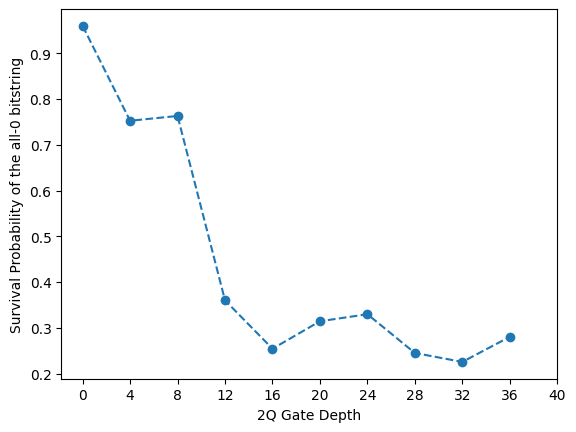

In [48]:
import matplotlib.pyplot as plt

plt.plot(list(range(0, 4 * max_trotter_steps, 4)), survival_probability_list, '--o')
plt.xlabel('2Q Gate Depth')
plt.ylabel('Survival Probability of the all-0 bitstring')
plt.xticks(np.arange(0, 44, 4))
plt.show()